# SHARKS AND DRAGONS DATASET

## EDA (EXPLORATORY DATA ANALYSIS)

### SUMARIO
### 1. Limpieza de datos Shark Tank Companies
### 2. Limpieza de datos Dragons Den Companies
### 3. Limpieza de datos Shark Tank Companies Seasons 5 to 11
### 4. Unimos los 3 datasets, unificamos variables y limpiamos nan

#### 1. Limpieza de datos Shark Tank Companies

In [3]:
#IMPORTAMOS LIBRERIAS GENERALES
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display


#IMPORTAMOS EL FICHERO CSV DE SHARK TANK
df_sharks = pd.read_csv('../data/raw/Shark Tank Companies.csv')

#MODIFICAMOS LA COLUMNA DE LOCATION PARA QUE SOLO APAREZCA EL PAIS DEL QUE SON LAS STARTUPS
df_sharks['location'] = 'USA'

#CREAMOS UN DICCIONARIO PARA MAPEAR LA TEMPORADA EN QUE FUERON LANZADAS Y UNA NUEVA COLUMNA CON EL AÑO
dicc_seasons = {
    1 : 2010,
    2: 2011,
    3: 2012,
    4: 2013,
    5: 2014,
    6: 2016
}
df_sharks['year'] = df_sharks['season'].map(dicc_seasons)

#CREAMOS UN DICCIONARIO PARA MAPEAR EL DEAL (NUESTRO TARGET) Y SUSTITUIRLO POR 1 Y 0
dicc_target = {
    True : 1,
    False: 0
}
df_sharks['deal'] = df_sharks['deal'].map(dicc_target)

#ELIMINAMOS LAS STARTUPS DE TEMPORADAS ANTERIORES A LA 5 PORQUE LES FALTA INFO
#HE ENCONTRADO OTRO DATASET PARA COMPLEMENTAR ESA INFO
df_sharks = df_sharks[df_sharks['season'] < 5]



#### 2. Limpieza de datos Dragons Den Companies

In [4]:
#IMPORTAMOS EL FICHERO EXCEL DE DRAGONS DEN
df_dragons = pd.read_excel('../data/raw/dragons_den_dataset.xlsx')

#CREAMOS UN DICCIONARIO PARA MAPEAR EL DEAL (NUESTRO TARGET) Y SUSTITUIRLO POR 1 Y 0
dicc_target = {
    True : 1,
    False: 0
}
df_dragons['deal'] = df_dragons['deal'].map(dicc_target)

#COMPARAMOS LAS COLUMNAS DE AMBOS DATASETS
print('sharks columns', df_sharks.columns)
print('\n dragons columns:', df_dragons.columns)

#CONCATENAMOS AMBOS DATASETS
df_concat_sd = pd.concat([df_sharks, df_dragons], ignore_index=True, sort=False)

sharks columns Index(['deal', 'description', 'episode', 'category', 'entrepreneurs',
       'location', 'website', 'askedFor', 'exchangeForStake', 'valuation',
       'season', 'shark1', 'shark2', 'shark3', 'shark4', 'shark5', 'title',
       'episode-season', 'Multiple Entreprenuers', 'year'],
      dtype='object')

 dragons columns: Index(['season', 'episode', 'date', 'year', 'entrepreneurs', 'title',
       'money_requested_gbp', 'askedFor', 'exchangeForStake', 'valuation',
       'description', 'category', 'investor', 'location', 'website', 'deal',
       'fate'],
      dtype='object')


#### 3. Limpieza de datos Shark Tank Companies Seasons 5 to 11

In [5]:
#IMPORTAMOS EL FICHERO EXCEL CON LA INFO EXTRA DE SHARK TANK
df_sharks_extra = pd.read_excel('../data/raw/Shark Tank Companies S05_to_S11.xlsx')

#MODIFICAMOS LA COLUMNA DE LOCATION PARA QUE SOLO APAREZCA EL PAIS DEL QUE SON LAS STARTUPS
df_sharks_extra['location'] = 'USA'

#AJUSTAMOS LAS CANTIDADES DE PORCENTAJE PARA QUE APAREZCAN EN %
df_sharks_extra['exchangeForStake'] = df_sharks_extra['exchangeForStake'] * 100

#CREAMOS UN DICCIONARIO PARA MAPEAR LA TEMPORADA EN QUE FUERON LANZADAS Y UNA NUEVA COLUMNA CON EL AÑO
dicc_seasons = {
    5: 2014,
    6: 2016,
    7 : 2017,
    8: 2018,
    9: 2019,
    10: 2020,
    11: 2021
}
df_sharks_extra['year'] = df_sharks_extra['season'].map(dicc_seasons)

#### 4. Unimos los 3 datasets, unificamos variables y limpiamos nan

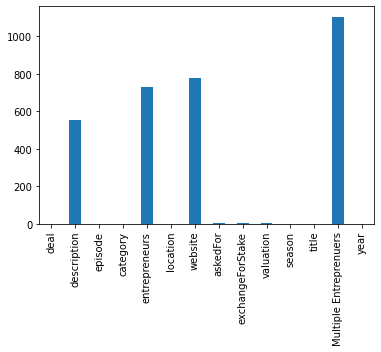

deal                      0
description               0
episode                   0
category                  0
entrepreneurs             0
location                  0
website                   0
askedFor                  2
exchangeForStake          2
valuation                 2
season                    0
title                     0
Multiple Entreprenuers    0
year                      1
dtype: int64


In [6]:
#CONCATENAMOS A LOS OTROS DOS DATASETS
df_concat_3 = pd.concat([df_concat_sd, df_sharks_extra], ignore_index=True, sort=False)

#ELIMINAMOS LAS COLUMNAS IRRELEVANTES
df_concat_3.drop(columns=['shark1', 'shark2', 'shark3', 'shark4', 'shark5', 'episode-season', 'money_requested_gbp', 'investor', 'fate', 'date'], inplace=True)

#COMPROBAMOS SI HAY VALORES NAN Y LOS REPRESENTAMOS GRAFICAMENTE
df_concat_3 = df_concat_3.dropna(how='all')
#print((df_concat_3.isna().sum())
df_concat_3.isna().sum().plot(kind="bar")
plt.show()

#CREAMOS UN DICCIONARIO PARA SUSTITUIR LOS NAN POR UNKNOWN
dicc_nan = {
       'episode': 'unknown', 
       'description': 'unknown', 
       'category': 'unknown', 
       'entrepreneurs': 'unknown',
       'location': 'unknown', 
       'website': 'unknown', 
       'title': 'unknown',
       'deal': 0
}
df_concat_3.fillna(value=dicc_nan, inplace=True)

#COMPROBAMOS LAS CATEGORIAS UNICAS PARA VER SI HAY DUPLICADOS
df_concat_3['category'].unique()

#CREAMOS UN DICCIONARIO PARA MAPEAR Y ASI UNIFICAR LOS DISTINTOS TIPOS DE CATEGORIAS
dicc_categories = {
    'Novelties': 'Novelties',
    'unknown': 'unknown',
    'Automotive': 'Automotive',
    'Specialty Food': 'Food and Beverage', 
    'Baby and Child Care': 'Children/Education',
    'Consumer Services': 'Business Services', 
    "Men and Women's Apparel": 'Fashion/Beauty',
    'Productivity Tools': 'Software/Tech', 
    'Education': 'Children/Education', 
    'Kitchen Tools': 'Lifestyle/Home',
    'Music': 'Media/Entertainment', 
    'Professional Services': 'Business Services', 
    'Online Services': 'Software/Tech',
    "Women's Accessories": 'Fashion/Beauty', 
    'Fitness Equipment': 'Fitness/Sports/Outdoors',
    'Undergarments and Basics': 'Fashion/Beauty', 
    'Non-Alcoholic Beverages': 'Food and Beverage',
    'Fitness Programs': 'Fitness/Sports/Outdoors', 
    'Entertainment': 'Media/Entertainment', 
    'Toys and Games': 'Children/Education',
    'Fashion Accessories': 'Fashion/Beauty', 
    "Women's Apparel": 'Fashion/Beauty', 
    'Electronics': 'Software/Tech',
    'Pet Products': 'Pet Products',
    'Golf Products': 'Fitness/Sports/Outdoors',
    "Baby and Children's Entertainment": 'Children/Education', 
    'Outdoor Recreation': 'Fitness/Sports/Outdoors',
    'Personal Care and Cosmetics': 'Fashion/Beauty',
    'Gardening': 'Lifestyle/Home', 
    "Women's Shoes": 'Fashion/Beauty',
    "Men's Accessories": 'Fashion/Beauty', 
    'Alcoholic Beverages': 'Food and Beverage',
    'Health and Well-Being': 'Health/Wellness', 
    'Fitness Apparel and Accessories': 'Fitness/Sports/Outdoors',
    'Furniture': 'Lifestyle/Home', 
    'Storage and Cleaning Products': 'Lifestyle/Home', 
    'Home Improvement': 'Lifestyle/Home',
    'Maternity': 'Children/Education', 
    'Home Accessories': 'Lifestyle/Home', 
    'Weddings': 'Media/Entertainment', 
    'Water Bottles': 'Lifestyle/Home',
    'Wine Accessories': 'Food and Beverage', 
    "Baby and Children's Apparel and Accessories": 'Children/Education',
    'Homeopathic Remedies': 'Health/Wellness', 
    "Men and Women's Shoes": 'Fashion/Beauty', 
    'Cycling': 'Fitness/Sports/Outdoors',
    'Pest Control': 'Business Services', 
    'Mobile Apps': 'Software/Tech', 
    "Men and Women's Accessories": 'Fashion/Beauty',
    'Costumes': 'Fashion/Beauty', 
    'Holiday Cheer': 'Travel', 
    'Party Supplies': 'Media/Entertainment',
    "Baby and Children's Bedding": 'Children/Education', 
    'Fiteness Apparel and Accessories': 'Fitness/Sports/Outdoors',
    'Technology': 'Software/Tech', 
    'Enterntainment': 'Media/Entertainment', 
    'Baby and Children': 'Children/Education',
    "Baby and Children's Enterntainment": 'Children/Education', 
    'Ecofriendly': 'Green/CleanTech', 
    'Mobile': 'Software/Tech',
    'Websites and apps': 'Software/Tech', 
    'Food and Beverage': 'Food and Beverage',
    'Software/Tech': 'Software/Tech', 
    'Health/Wellness': 'Health/Wellness', 
    'Lifestyle/Home': 'Lifestyle/Home', 
    'Travel': 'Travel',
    'Children/Education': 'Children/Education', 
    'Fitness/Sports/Outdoors': 'Fitness/Sports/Outdoors', 
    'Fashion/Beauty': 'Fashion/Beauty',
    'Business Services': 'Business Services', 
    'Media/Entertainment': 'Media/Entertainment', 
    'Green/CleanTech': 'Green/CleanTech'
}
df_concat_3['category'] = df_concat_3['category'].map(dicc_categories)

#VOLVEMOS A COMPROBAR
df_concat_3['category'].unique()

#CONVERTIMOS LA COLUMNA DE MULTIPLE ENTREPRENEURS A 0 Y 1 
list_mult = []
for i in df_concat_3['entrepreneurs']:
    if i.count(',') > 0 or i.count('and') > 0:
        list_mult.append(1)
    else:
        list_mult.append(0)
df_concat_3['Multiple Entreprenuers'] = list_mult

#VOLVEMOS COMPROBAR SI QUEDA ALGUN NAN
print(df_concat_3.isna().sum())

#ELIMINAMOS LAS 2 FILAS QUE AUN CONTIENEN NAN PORQUE LES FALTA DEMASIADA INFO PARA UTILIZARLAS
df_concat_3 = df_concat_3.dropna(how= 'any')

#CREAMOS UN DICCIONARIO PARA MAPEAR EL DEAL (NUESTRO TARGET) Y SUSTITUIRLO POR 1 Y 0
dicc_location = {
    'USA' : 1,
    'GBR': 0
}
df_concat_3['location'] = df_concat_3['location'].map(dicc_location)

#UTILIZAMOS EL METODO GET_DUMMIES PARA LA VARIABLE CATEGORY
df_concat_dummies = pd.get_dummies(df_concat_3, columns= ['category'], drop_first= True, prefix= 'cat')

#ELIMINAMOS LAS COLUMNAS IRRELEVANTES
df_concat_dummies.drop(columns=['episode', 'website', 'season'], inplace=True)

#FINALMENTE COMPROBAMOS QUE NOS QUEDAN LAS COLUMNAS QUE QUEREMOS
#LAS UNICAS CATEGORICAS CON TITLE, DESCRIPTION Y ENTREPRENEURS QUE NO NOS SIRVEN PARA EL MODELO PERO SI PARA SABER LOS DETALLES DE LA STARTUP
df_concat_dummies.columns
df_concat_dummies.dtypes

#UNA VEZ LISTO NUESTRO NUEVO DF LISTO PARA APLICARLE MODELOS, LO GUARDAMOS COMO CSV
#df_concat_dummies.to_csv('../data/processed/sharks_and_dragons_dataset.csv')